#In this part 
## 1-face and eye detection
## 2-vehicle detection in video
## 3-prespective transfer
## 4-Histogram Representations
## 5-similarity between photos

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
def show(image=None,string='',size=10):
  width,hight=image.shape[:2]
  asp=width/hight
  plt.figure(figsize=(asp*size,size))
  plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
  plt.title(string)
  plt.show()

!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/haarcascades.zip

!unzip -qq images.zip
!unzip -qq haarcascades.zip

--2023-04-23 12:06:14--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.148.78
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.148.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29586716 (28M) [application/zip]
Saving to: ‘images.zip.1’

images.zip.1        100%[===================>]  28.22M  97.4MB/s    in 0.3s    

2023-04-23 12:06:15 (97.4 MB/s) - ‘images.zip.1’ saved [29586716/29586716]

--2023-04-23 12:06:15--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/haarcascades.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.148.78
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.148.78|:443... connected.
HT

In [2]:
def face_eye_detect(image):
  face_de=cv2.CascadeClassifier("/content/Haarcascades/haarcascade_frontalface_default.xml")
  eye_de=cv2.CascadeClassifier('/content/Haarcascades/haarcascade_eye.xml')
  gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  face=face_de.detectMultiScale(gray, scaleFactor = 1.3, minNeighbors = 5)
  if face is():
    print("there is no face in the image")
  else:
    for (x,y,w,h) in face:
      cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
      gray_e=gray[y:(y+h),x:(x+w)]
      image_e=image[y:(y+h),x:(x+w)]
      eye=eye_de.detectMultiScale(gray_e,1.2,5)
      for (ex,ey,ew,eh) in eye:
        cv2.rectangle(image_e,(ex,ey),((ex+ew),(ey+eh)),(255,0,0),2)
  return image

<>:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
<ipython-input-2-810cca3dd68a>:6: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if face is():


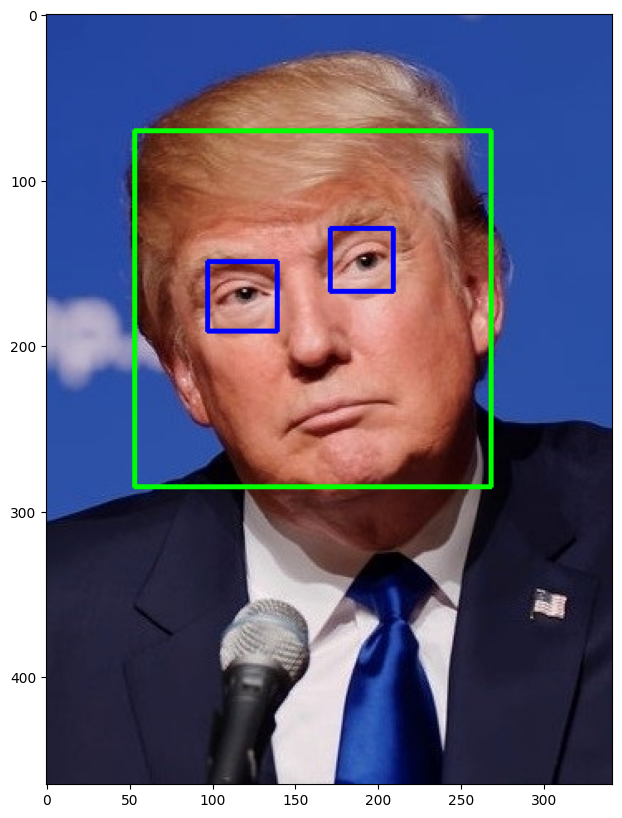

In [3]:
image = cv2.imread('images/Trump.jpg')
show(face_eye_detect(image))



In [ ]:
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/videos.zip
!unzip -qq videos.zip

--2023-04-23 12:06:32--  https://moderncomputervision.s3.eu-west-2.amazonaws.com/videos.zip
Resolving moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)... 52.95.143.10
Connecting to moderncomputervision.s3.eu-west-2.amazonaws.com (moderncomputervision.s3.eu-west-2.amazonaws.com)|52.95.143.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4142728 (4.0M) [application/zip]
Saving to: ‘videos.zip.1’

videos.zip.1        100%[===================>]   3.95M  --.-KB/s    in 0.1s    

2023-04-23 12:06:32 (35.7 MB/s) - ‘videos.zip.1’ saved [4142728/4142728]

replace walking.mp4? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
capture=cv2.VideoCapture('cars.mp4')

w=int(capture.get(3))
h=int(capture.get(4))

out=cv2.VideoWriter('cars_output.avi', cv2.VideoWriter_fourcc('M','J','P','G'), 30, (w, h))
car_det=cv2.CascadeClassifier("/content/Haarcascades/haarcascade_car.xml")

while(True):
  ret, frame = capture.read()
  if(ret):
    gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    cars=car_det.detectMultiScale(gray, 1.2, 3)
    for (x,y,w,h) in cars:
      cv2.rectangle(frame,(x,y),((x+w),(y+h)),(0,255,0),2)
    out.write(frame)
  else:
    break
capture.release()
out.release()

In [ ]:
!ffmpeg -i /content/cars_output.avi cars_output.mp4 -y

In [ ]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('cars_output.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

In [ ]:
HTML("""
<video controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [ ]:
image = cv2.imread('images/scan.jpg')
show(image,"original")
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
_,thr=cv2.threshold(gray,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
counter,_=cv2.findContours(thr,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
cv2.drawContours(image,counter,-2,(0,255,0),thickness = 2)
show(image,"detected the target")

In [ ]:
sorted_counter=sorted(counter,key=cv2.contourArea, reverse=True)
for cn in sorted_counter:
  perimeter=cv2.arcLength(cn,True)
  approx=cv2.approxPolyDP(cn,0.05 * perimeter,True)
  if len(approx)==4:
    break
print(approx)

In [ ]:
inp=np.float32(approx)
out=np.float32(
                      [[0,0],
                       [0,800],
                       [500,800],
                       [500,0]]
)
M = cv2.getPerspectiveTransform(inp,out)

# Apply the transform Matrix M using Warp Perspective
dst = cv2.warpPerspective(image, M, (500,800))
show(dst)



In [ ]:
def histc(image):
  plt.hist(image.ravel(), 256, [0, 256])
  plt.show()


  color={'b','g','r'}
  for i, col in enumerate(color):
    hists=cv2.calcHist([image], [i], None, [256], [0, 256])
    plt.plot(hists,color=col)
    plt.xlim=([0,256])
  plt.show()



In [ ]:
image = cv2.imread('images/input.jpg')
show(image)
histc(image)

In [ ]:
image = cv2.imread('images/tobago.jpg')
show(image)
histc(image)

In [ ]:
from skimage.metrics import structural_similarity


In [ ]:
def mse(image1,image2):
  sum=np.sum((image1.astype("float")-image2.astype("float"))**2)
  sum/=float(image1.shape[1]*image1.shape[0])
  return sum

In [ ]:
def compare(image1,image2):
  image1=cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
  image2=cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)
  print("The mse of the photos is {}".format(mse(image1,image2)))
  print("The ss of the photos is {}".format(structural_similarity(image1, image2)))

In [ ]:
fireworks1 = cv2.imread('images/fireworks.jpeg')
fireworks2 = cv2.imread('images/fireworks2.jpeg')
compare(fireworks1,fireworks2)

In [ ]:
compare(fireworks1, fireworks1)